In [ ]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Note
#   If you are using Google Colab, the following cell is needed. It connects this notebook
#   to your Google Drive. If you are using Jupyter notebooks, then this cell is (probably)
#   not needed. You just need to ensure that the xlsx file is in the folder.


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/STAT 312/LAB Activity B/"
os.chdir(pathname)


Mounted at /content/drive


In [ ]:
filename = "RuralAtlasData24.xlsx"

In [ ]:
dtJ = pd.read_excel(filename, sheet_name="Income")
dtC = pd.read_excel(filename, sheet_name="County Classifications")

In [ ]:
dtJ

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
0,0,US,United States,69021.0,37638.0,17.046705,12.631850,5.777385,7.691715,40661636.0,16.9,12243219.0,69717.0,41393176.0,12.8,12443424.0
1,1000,AL,Alabama,54943.0,30458.0,22.261936,15.785127,7.077316,10.390582,769819.0,22.7,250327.0,53990.0,800848.0,16.3,245896.0
2,1001,AL,Autauga,62660.0,30968.0,18.673864,13.578474,6.250216,8.592895,7847.0,16.1,2199.0,66444.0,6296.0,10.7,2560.0
3,1003,AL,Baldwin,64346.0,35384.0,11.299822,9.204905,4.043401,5.503712,20598.0,16.4,8207.0,65658.0,25526.0,10.8,5449.0
4,1005,AL,Barbour,36422.0,21325.0,43.744012,26.471910,12.826966,26.729258,5890.0,35.1,1776.0,38649.0,5089.0,23.0,2283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,72145,PR,Vega Baja,21507.0,12361.0,52.765611,43.361233,22.362745,33.370684,23520.0,NaN,NaN,NaN,NaN,NaN,5180.0
3276,72147,PR,Vieques,14942.0,8834.0,85.998715,53.204280,32.271252,56.775851,4425.0,NaN,NaN,NaN,NaN,NaN,1339.0
3277,72149,PR,Villalba,20722.0,12179.0,55.402662,44.494979,28.576575,43.085946,9881.0,NaN,NaN,NaN,NaN,NaN,2456.0
3278,72151,PR,Yabucoa,17267.0,10507.0,66.122597,52.622254,26.283745,42.056583,16335.0,NaN,NaN,NaN,NaN,NaN,3646.0


In [ ]:
dtC

,FIPStxt,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,72145,PR,Vega Baja,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3223,72147,PR,Vieques,7.0,12.0,7.0,12.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN
3224,72149,PR,Villalba,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3225,72151,PR,Yabucoa,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [ ]:
dtC.rename(columns={"FIPStxt": "FIPS"}, inplace=True)

In [ ]:
dtC

,FIPS,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,72145,PR,Vega Baja,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3223,72147,PR,Vieques,7.0,12.0,7.0,12.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN
3224,72149,PR,Villalba,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3225,72151,PR,Yabucoa,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [ ]:
dt = pd.merge(dtJ, dtC,  on='FIPS')

In [ ]:
dt.columns

Index(['FIPS', 'State_x', 'County_x', 'Median_HH_Inc_ACS', 'PerCapitaInc',
       'Poverty_Rate_0_17_ACS', 'Poverty_Rate_ACS', 'Deep_Pov_All',
       'Deep_Pov_Children', 'NumAll_inPOV_ACS', 'PCTPOV017', 'POV017',
       'MedHHInc', 'POVALL', 'PCTPOVALL', 'Num_inPOV_0_17_ACS', 'State_y',
       'County_y', 'RuralUrbanContinuumCode2013', 'UrbanInfluenceCode2013',
       'RuralUrbanContinuumCode2003', 'UrbanInfluenceCode2003', 'Metro2013',
       'Nonmetro2013', 'Micropolitan2013', 'Type_2015_Update',
       'Type_2015_Farming_NO', 'Type_2015_Manufacturing_NO',
       'Type_2015_Mining_NO', 'Type_2015_Government_NO',
       'Type_2015_Recreation_NO', 'Low_Education_2015_update',
       'Low_Employment_2015_update', 'Population_loss_2015_update',
       'Retirement_Destination_2015_Update', 'Perpov_1980_0711',
       'PersistentChildPoverty_1980_2011', 'Hipov', 'HiAmenity',
       'HiCreativeClass2000', 'Gas_Change', 'Oil_Change', 'Oil_Gas_Change',
       'Metro2003', 'NonmetroNotAdj2003'

In [ ]:
df = dt[dt.Median_HH_Inc_ACS.notna() & dt.UrbanInfluenceCode2013.notna()]

In [ ]:
df.Median_HH_Inc_ACS

,Median_HH_Inc_ACS
0,62660.0
1,64346.0
2,36422.0
3,54277.0
4,52830.0
...,...
3222,21507.0
3223,14942.0
3224,20722.0
3225,17267.0


In [ ]:
mod = ss.linregress(df.UrbanInfluenceCode2013, df.Median_HH_Inc_ACS)

In [ ]:
mod

LinregressResult(slope=-1523.7061201289675, intercept=65214.84885467738, rvalue=-0.325283997284749, pvalue=3.421650438094601e-80, stderr=78.10799252750046, intercept_stderr=488.78404866804624)

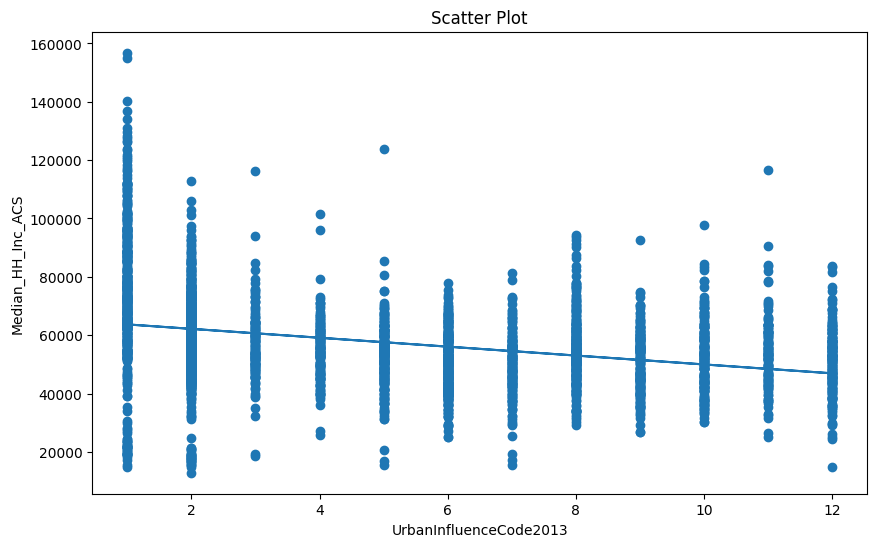

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.UrbanInfluenceCode2013, df.Median_HH_Inc_ACS)
plt.plot(df.UrbanInfluenceCode2013,mod.slope*df.UrbanInfluenceCode2013+mod.intercept)

# Add labels and title
plt.xlabel("UrbanInfluenceCode2013")
plt.ylabel("Median_HH_Inc_ACS")
plt.title("Scatter Plot")


# Show the plot
plt.show()

In [ ]:
y_predict = mod.slope*5 + mod.intercept
y_predict

57596.31825403254

In [ ]:
true = df[(df.County_x == "Knox") & (df.State_x == "IL") & (df.UrbanInfluenceCode2013 == 5)].Median_HH_Inc_ACS


In [ ]:
true

,Median_HH_Inc_ACS
648,45994.0


In [ ]:
def minkowski_distance(x, y, r):
  return np.sum(np.abs(x - y) * r) * (1 / r)

In [ ]:
importantMeasures = dt.loc[:, ["Metro_Adjacent2013", "Micropolitan2013", "Type_2015_Farming_NO","Type_2015_Manufacturing_NO"] ]
importantMeasures

,Metro_Adjacent2013,Micropolitan2013,Type_2015_Farming_NO,Type_2015_Manufacturing_NO
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
3222,0.0,0.0,NaN,NaN
3223,0.0,0.0,NaN,NaN
3224,0.0,0.0,NaN,NaN
3225,0.0,0.0,NaN,NaN


In [ ]:
importantMeasures.iloc[648]
importantMeasures.iloc[694]
importantMeasures.iloc[629]

,629
Metro_Adjacent2013,1.0
Micropolitan2013,1.0
Type_2015_Farming_NO,0.0
Type_2015_Manufacturing_NO,0.0


In [ ]:
print(f"Knox v Warren hamming  {minkowski_distance(importantMeasures.iloc[648], importantMeasures.iloc[694],1)}")
print(f"Knox v Fulton hamming  {minkowski_distance(importantMeasures.iloc[648], importantMeasures.iloc[629],1)}")

Knox v Warren hamming  2.0
Knox v Fulton hamming  0.0


In [ ]:
print(f"Euclidean distance Knox and Warren: {minkowski_distance(importantMeasures.iloc[648], importantMeasures.iloc[694],2)}")
print(f"Euclidean distance Knox and Fulton {minkowski_distance(importantMeasures.iloc[648], importantMeasures.iloc[629],2)}")

Euclidean distance Knox and Warren: 2.0
Euclidean distance Knox and Fulton 0.0


In [ ]:
def cosine_similarity(x, y):

     return  np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
print(f"Knox v Warren angle {cosine_similarity(importantMeasures.iloc[648], importantMeasures.iloc[694])}")
print(f"Knox v Fulton angle {cosine_similarity(importantMeasures.iloc[648], importantMeasures.iloc[629])}")
print(f"Knox v Fulton angle {cosine_similarity(importantMeasures.iloc[629], importantMeasures.iloc[694])}")

Knox v Warren angle 0.4999999999999999
Knox v Fulton angle 0.9999999999999998
Knox v Fulton angle 0.4999999999999999


In [ ]:
found_first = False
found_second = False

knox = importantMeasures.iloc[648]

for idx, row in importantMeasures.iterrows():
    angle = cosine_similarity(knox, row)

    if not found_first and math.isclose(angle, 1):
        print(f"County with angle difference ~0 degrees with Knox: {dt.iloc[idx].County_x}, {dt.iloc[idx].State_x}, Angle: {angle}")
        found_first = True

    if not found_second and math.isclose(angle, 0):
        print(f"County with angle difference ~90 degrees with Knox: {dt.iloc[idx].County_x}, {dt.iloc[idx].State_x}, Angle: {angle}")
        found_second = True

    if found_first and found_second:
        break


County with angle difference ~0 degrees with Knox: Chambers, AL, Angle: 0.9999999999999998
County with angle difference ~90 degrees with Knox: Choctaw, AL, Angle: 0.0


<ipython-input-48-f6b663f631f9>:3: RuntimeWarning: invalid value encountered in scalar divide
  return  np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
